In [4]:
# decision trees
library(tree)

ERROR: Error in library(tree): there is no package called 'tree'


In [7]:
Carseats=read.csv("Carseats.csv",header=T)
attach(Carseats)
High=ifelse(Sales<=8,"No","Yes")
Carseats=data.frame(Carseats,High)
tree.carseats=tree(High~.-Sales,Carseats)
summary(tree.carseats)
plot(tree.carseats)
text(tree.carseats,pretty=0)
tree.carseats
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
High.test=High[-train]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(86+57)/200
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)
cv.carseats
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(94+60)/200
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)
(86+62)/200

ERROR: Error in tree(High ~ . - Sales, Carseats): could not find function "tree"



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 10.51656
                    % Var explained: 87.27

[1] 12.96552

[1] 13.28971

[1] 11.37984

,%IncMSE,IncNodePurity
crim,12.306294,1112.67075
zn,2.985459,47.66963
indus,10.724357,942.77085
chas,2.369347,54.57706
nox,11.320176,893.09906
rm,32.062211,6552.39343
age,11.425088,565.80706
dis,14.330793,1343.06751
rad,4.668673,83.86627
tax,8.635902,514.54966


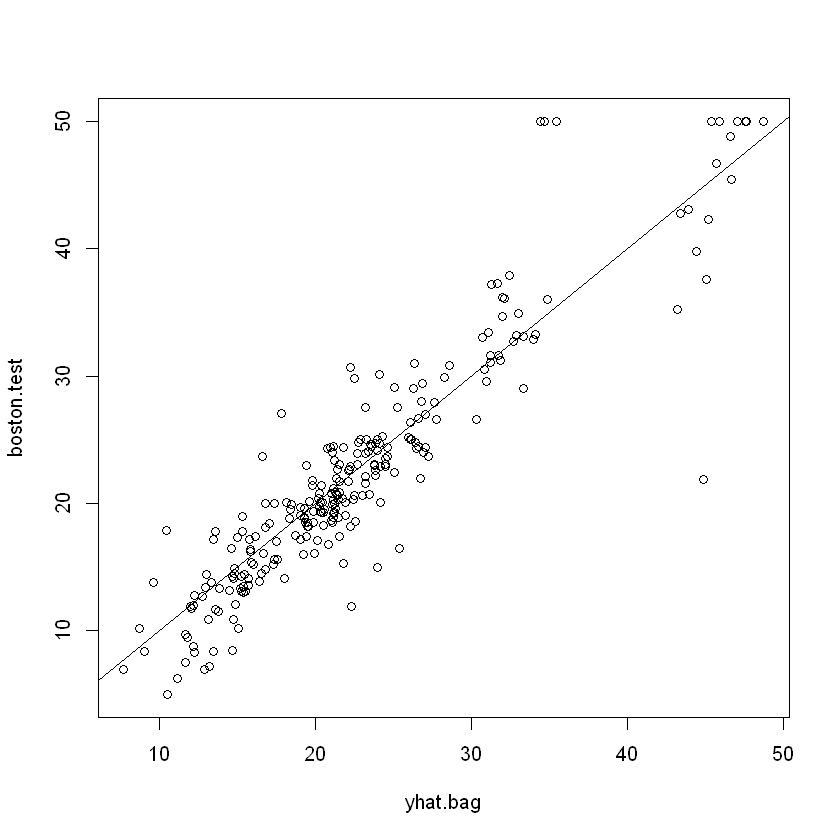

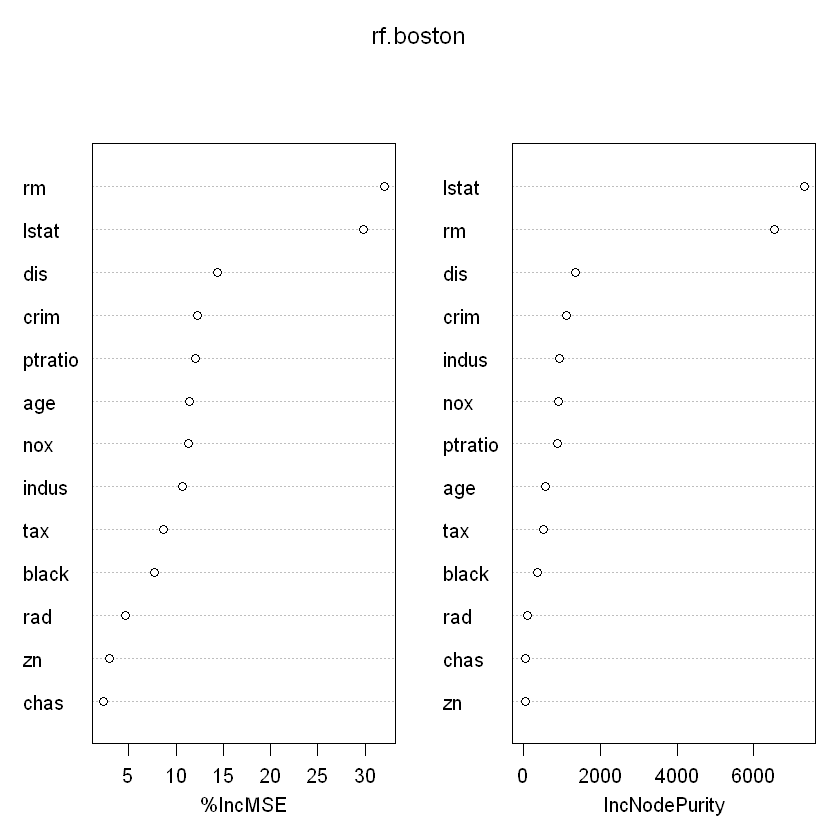

In [19]:
# random forest
library(randomForest)
library(MASS)
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)

bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston

#predict
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

#use number of trees=25
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

# for regression choose ntree=3, =p/3
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)
importance(rf.boston)
varImpPlot(rf.boston)


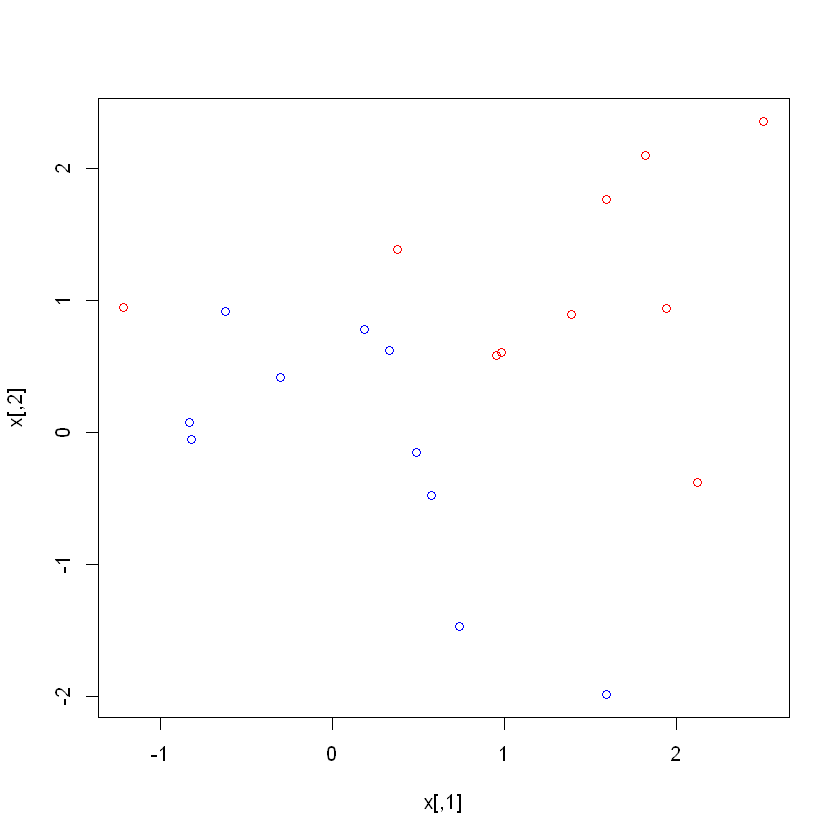

[1]  1  2  5  7 14 16 17


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




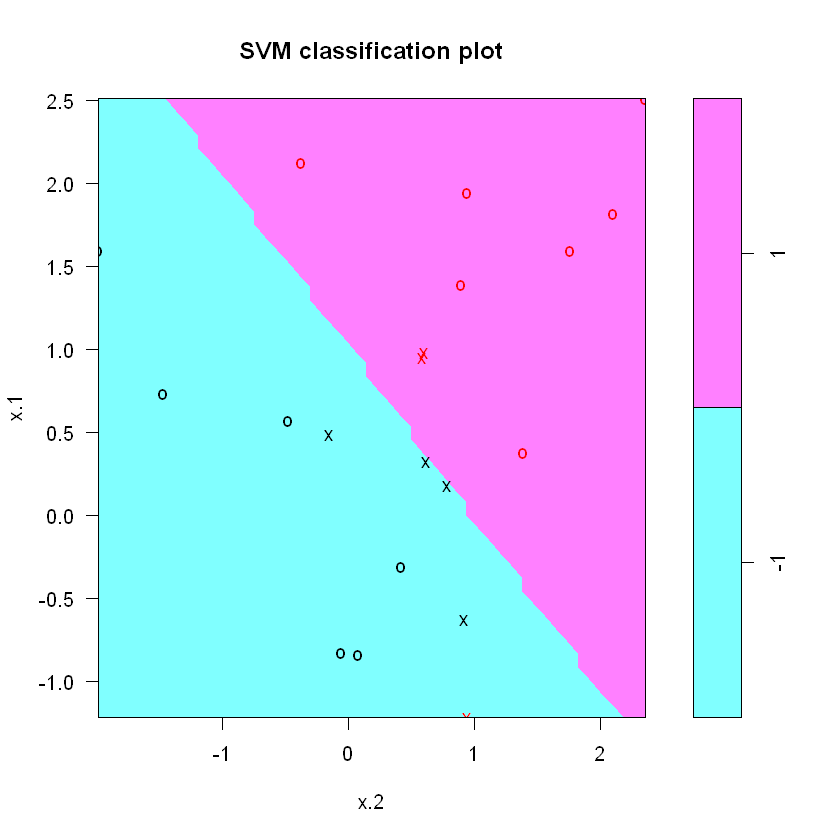

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




       truth
predict -1  1
     -1 11  1
     1   0  8

       truth
predict -1  1
     -1 11  2
     1   0  7

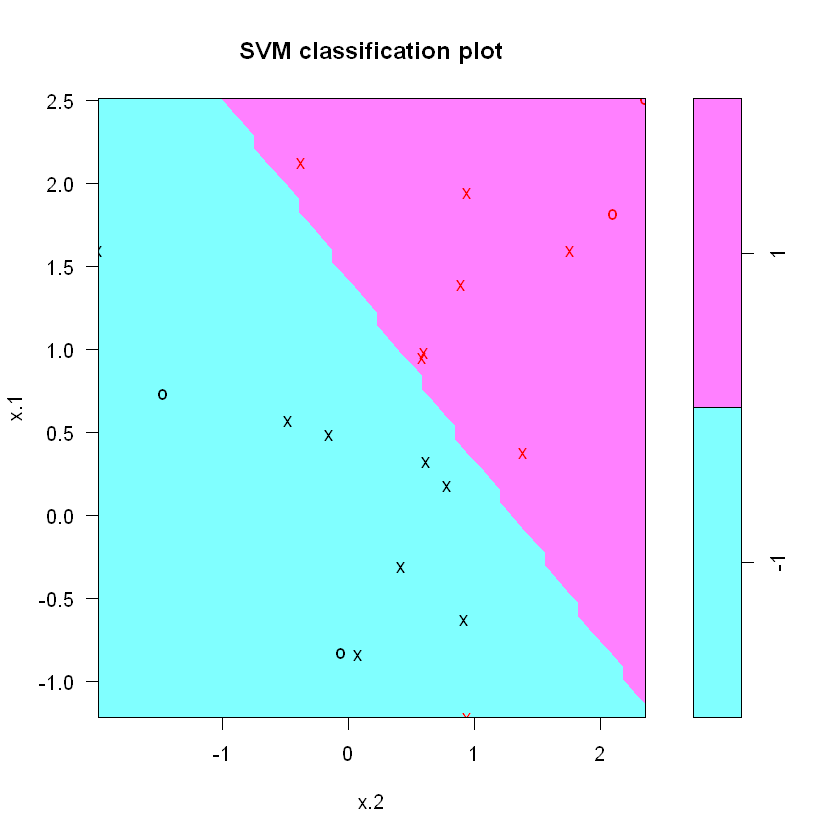


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




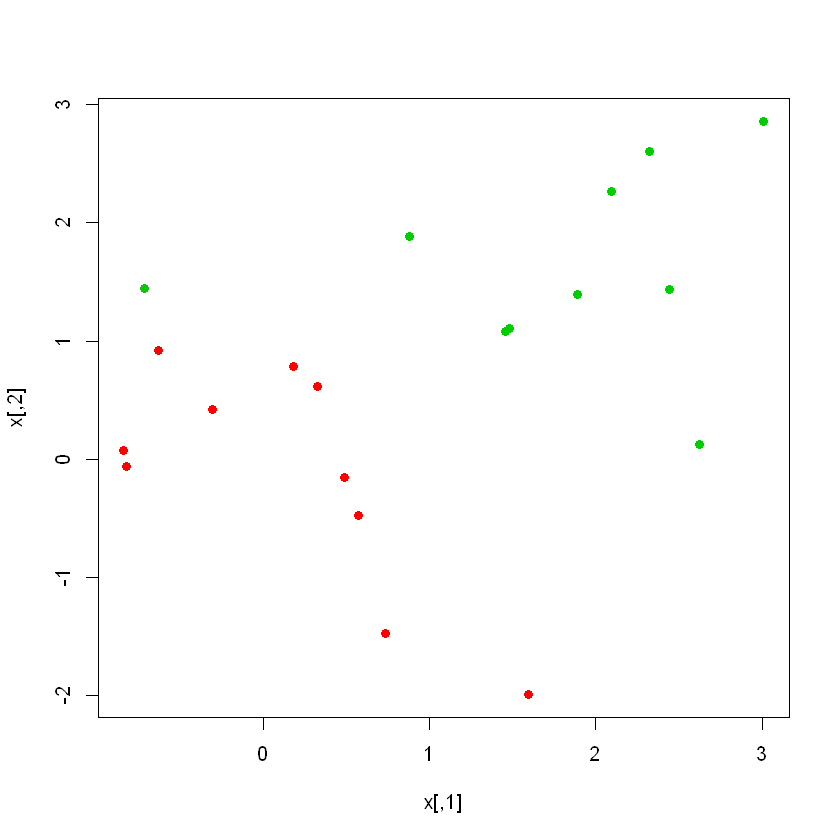


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




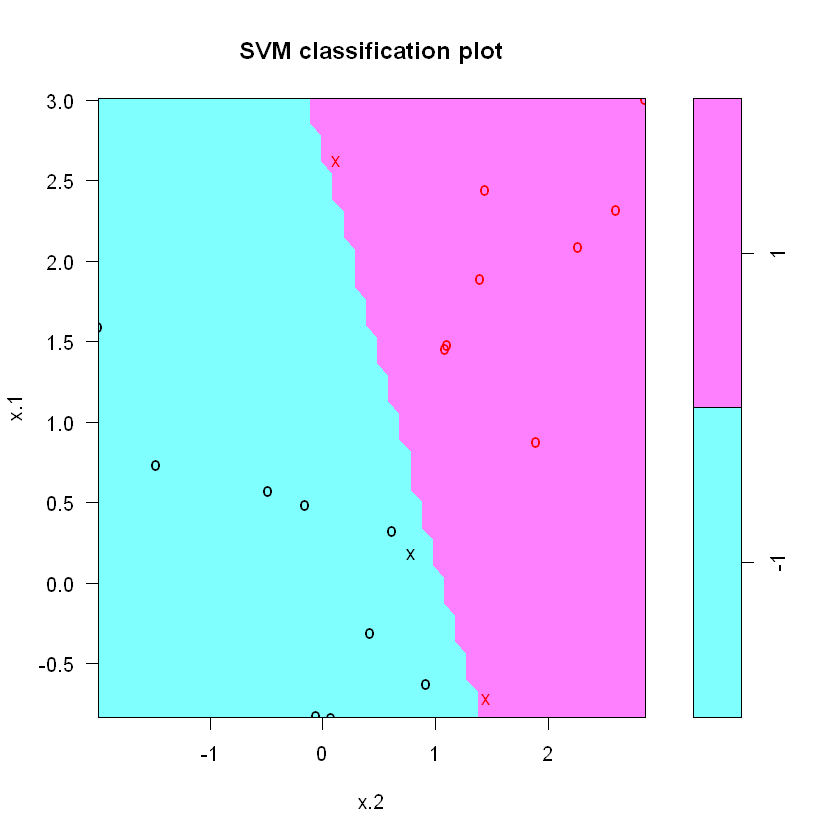

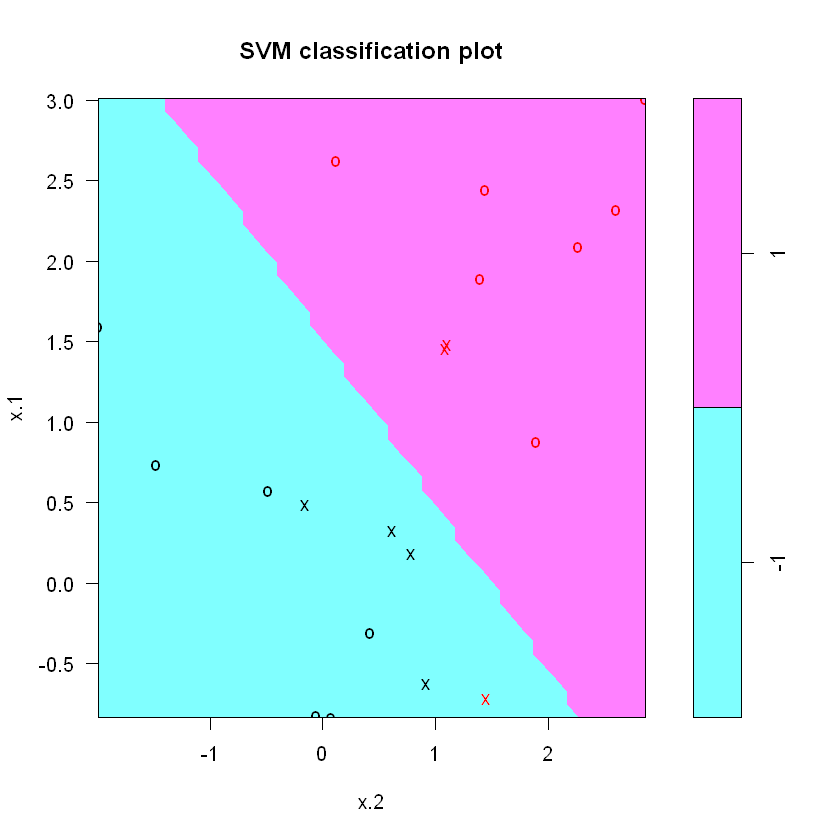

In [27]:
#svm

library(e1071)
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10))
x[y==1,]=x[y==1,] + 1
plot(x, col=(3-y))
dat=data.frame(x=x, y=as.factor(y))

#svm fit with cost=10
svmfit=svm(y~., data=dat, kernel="linear", cost=10,scale=FALSE)
plot(svmfit, dat)
svmfit$index
summary(svmfit)

#svm fit with cost=.1
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1,scale=FALSE)
plot(svmfit, dat)
svmfit$index
set.seed(1)

#find best value of c and cross validate
tune.out=tune(svm,y~.,data=dat,kernel="linear",ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
summary(tune.out)
bestmod=tune.out$best.model
summary(bestmod)

#predict using test data
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))
ypred=predict(bestmod,testdat)
table(predict=ypred, truth=testdat$y)

#change cost to .01
svmfit=svm(y~., data=dat, kernel="linear", cost=.01,scale=FALSE)
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)
dat=data.frame(x=x,y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)
plot(svmfit, dat)
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit,dat)

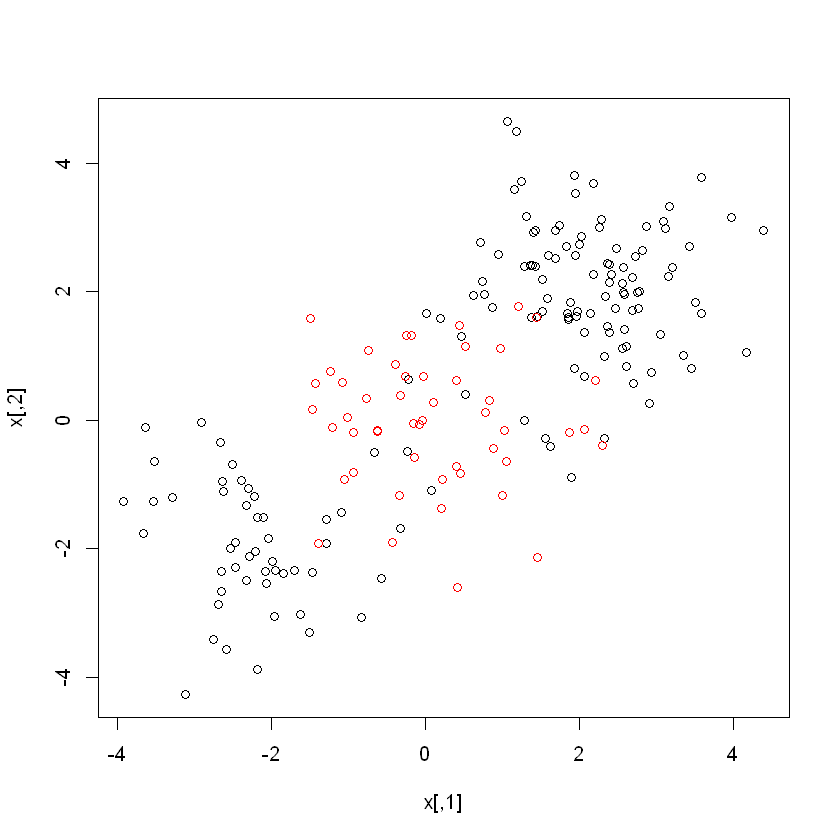


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  37

 ( 17 20 )


Number of Classes:  2 

Levels: 
 1 2




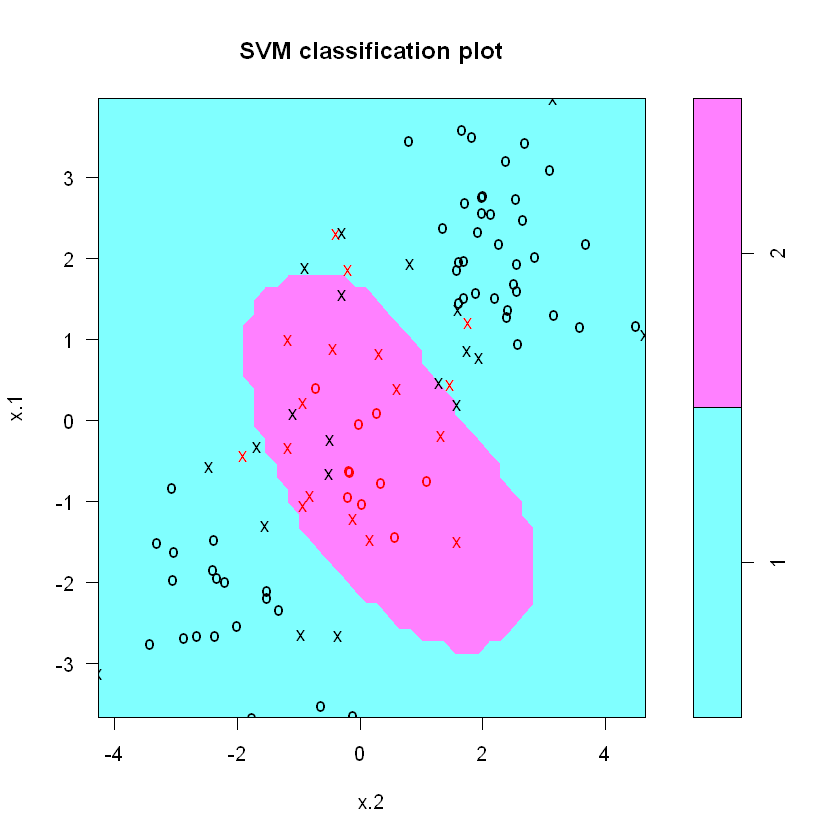


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1     2

- best performance: 0.12 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.11595018
2  1e+00   0.5  0.13 0.08232726
3  1e+01   0.5  0.15 0.07071068
4  1e+02   0.5  0.17 0.08232726
5  1e+03   0.5  0.21 0.09944289
6  1e-01   1.0  0.25 0.13540064
7  1e+00   1.0  0.13 0.08232726
8  1e+01   1.0  0.16 0.06992059
9  1e+02   1.0  0.20 0.09428090
10 1e+03   1.0  0.20 0.08164966
11 1e-01   2.0  0.25 0.12692955
12 1e+00   2.0  0.12 0.09189366
13 1e+01   2.0  0.17 0.09486833
14 1e+02   2.0  0.19 0.09944289
15 1e+03   2.0  0.20 0.09428090
16 1e-01   3.0  0.27 0.11595018
17 1e+00   3.0  0.13 0.09486833
18 1e+01   3.0  0.18 0.10327956
19 1e+02   3.0  0.21 0.08755950
20 1e+03   3.0  0.22 0.10327956
21 1e-01   4.0  0.27 0.11595018
22 1e+00   4.0  0.15 0.10801234
23 1e+01   4.0  0.18 0.11352924
24 1e+02   4.0  0.21 0.08755950
25 1e+03   4.0  0.24 0

    pred
true  1  2
   1 74  3
   2  7 16

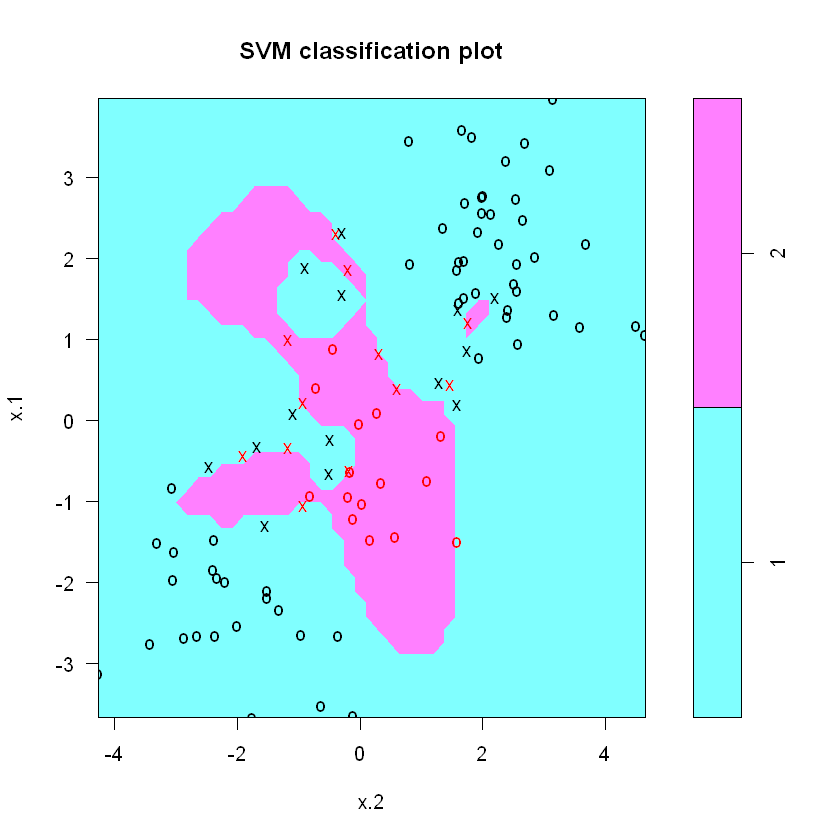

In [31]:
#svm kernel=radial

set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,]=x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(1,150),rep(2,50))
dat=data.frame(x=x,y=as.factor(y))
plot(x, col=y)

#fit radial kernel with c=1
train=sample(200,100)
svmfit=svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])
summary(svmfit)

svmfit=svm(y~., data=dat[train,], kernel="radial",gamma=1,cost=1e5)
plot(svmfit,dat[train,])

#cross validation to select best cost and gamma
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000),gamma=c(0.5,1,2,3,4)))
summary(tune.out)

#predict using the best model
table(true=dat[-train,"y"], pred=predict(tune.out$best.model,newdata=dat[-train,]))


Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



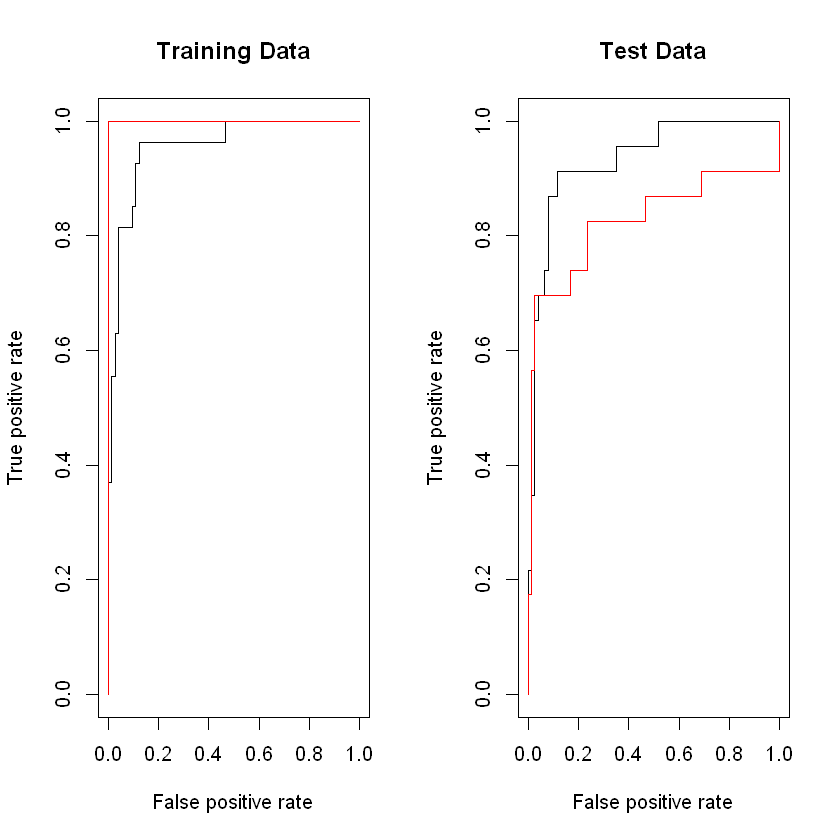

In [32]:
# ROC Curves

library(ROCR)
rocplot=function(pred, truth, ...){
   predob = prediction(pred, truth)
   perf = performance(predob, "tpr", "fpr")
   plot(perf,...)}
svmfit.opt=svm(y~., data=dat[train,], kernel="radial",gamma=2, cost=1,decision.values=T)
fitted=attributes(predict(svmfit.opt,dat[train,],decision.values=TRUE))$decision.values
par(mfrow=c(1,2))
rocplot(fitted,dat[train,"y"],main="Training Data")
svmfit.flex=svm(y~., data=dat[train,], kernel="radial",gamma=50, cost=1, decision.values=T)
fitted=attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values
rocplot(fitted,dat[train,"y"],add=T,col="red")
fitted=attributes(predict(svmfit.opt,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],main="Test Data")
fitted=attributes(predict(svmfit.flex,dat[-train,],decision.values=T))$decision.values
rocplot(fitted,dat[-train,"y"],add=T,col="red")


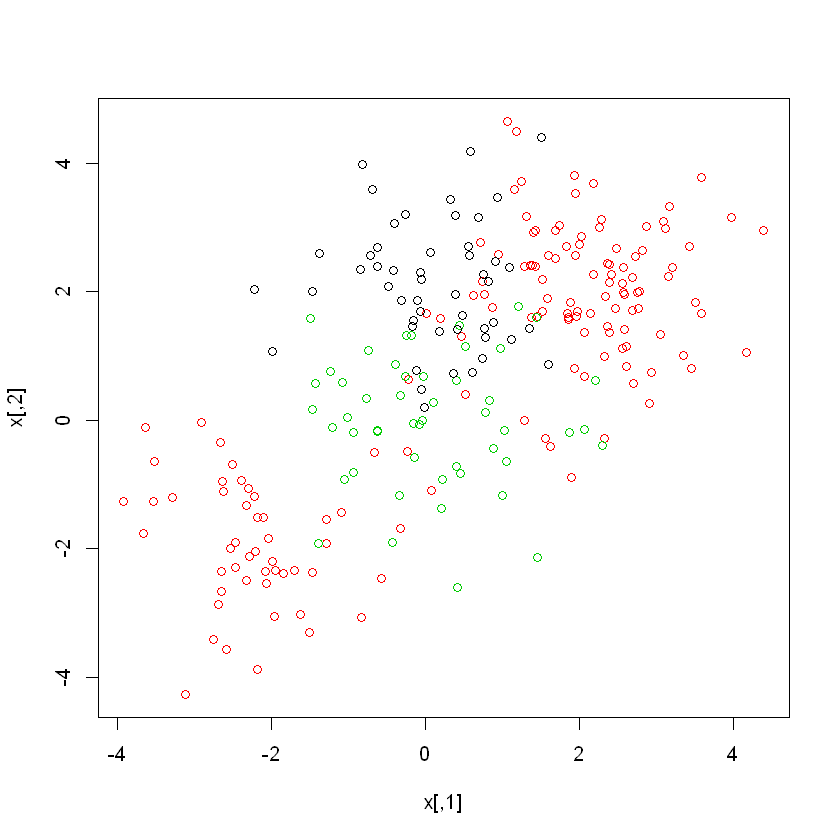

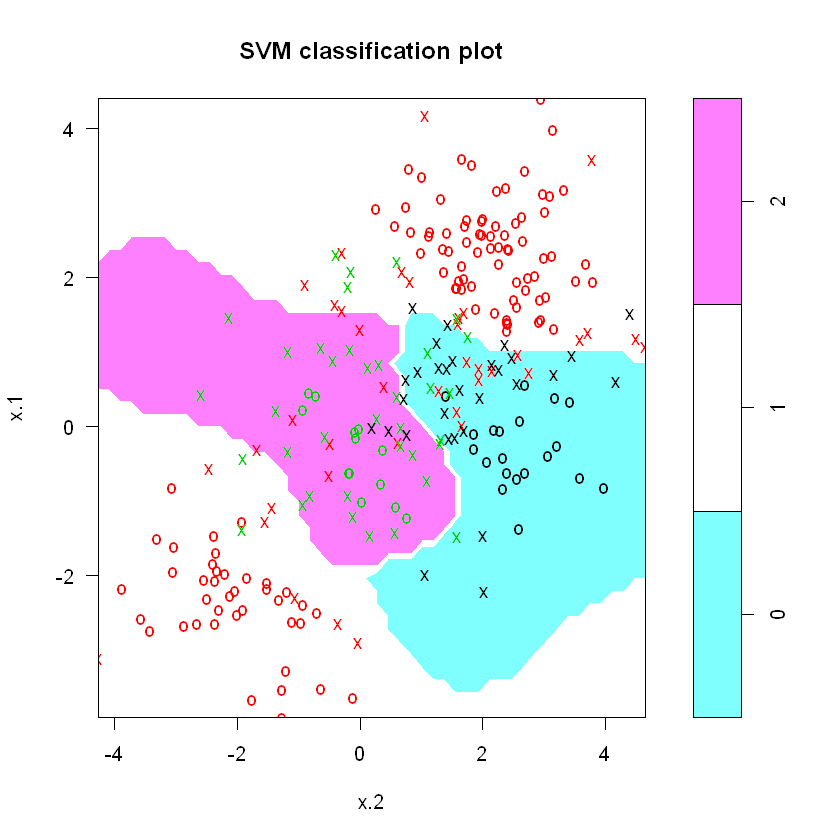

In [33]:
# SVM with Multiple Classes

set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat=data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x,col=(y+1))
svmfit=svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

[1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"

[1] "Murder"   "Assault"  "UrbanPop" "Rape"

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

[1] "sdev"     "rotation" "center"   "scale"    "x"

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


[1] 50  4

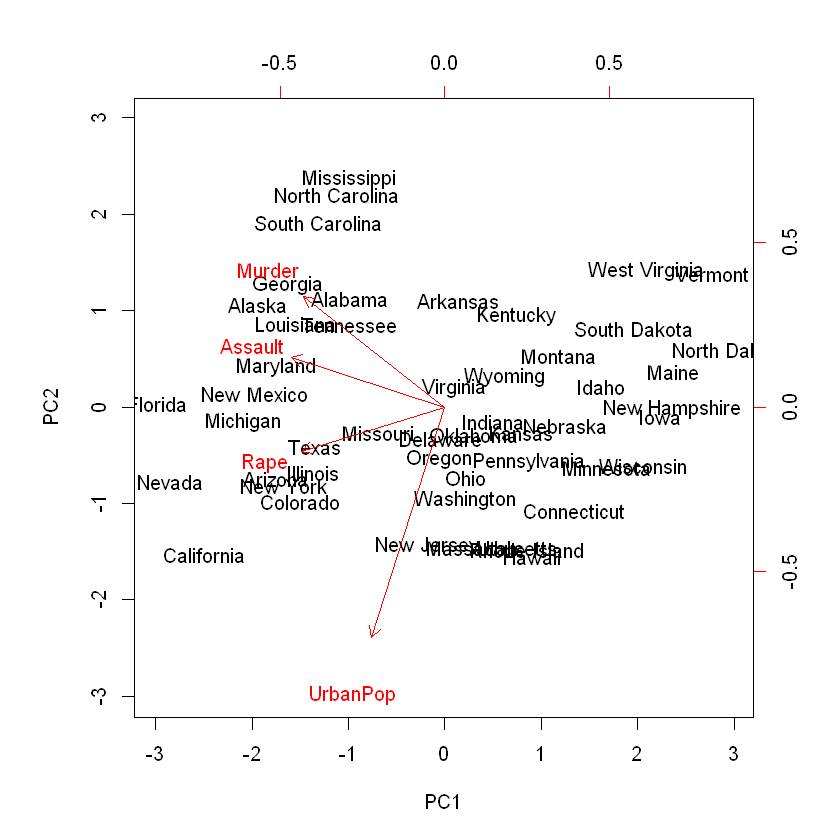

[1] 1.5748783 0.9948694 0.5971291 0.4164494

[1] 2.4802416 0.9897652 0.3565632 0.1734301

[1] 0.62006039 0.24744129 0.08914080 0.04335752

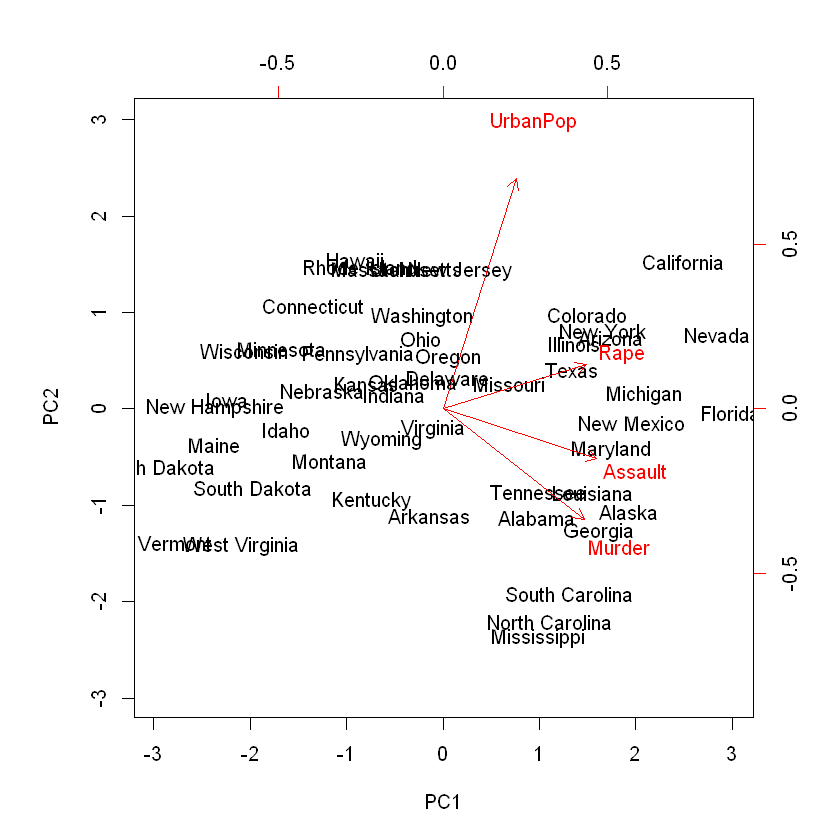

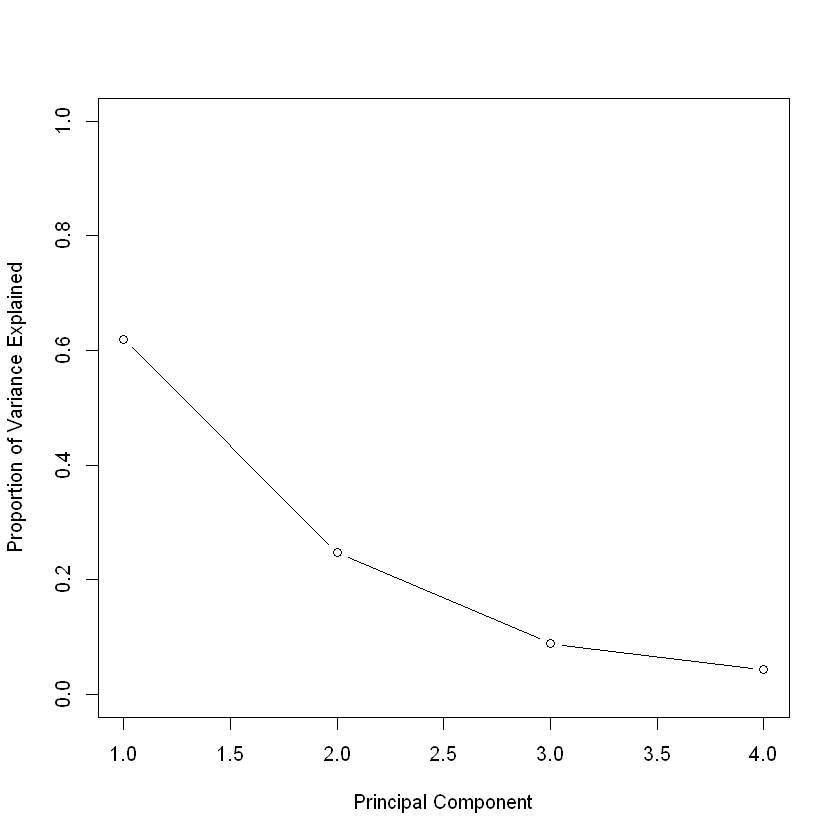

[1]  1  3 11  8

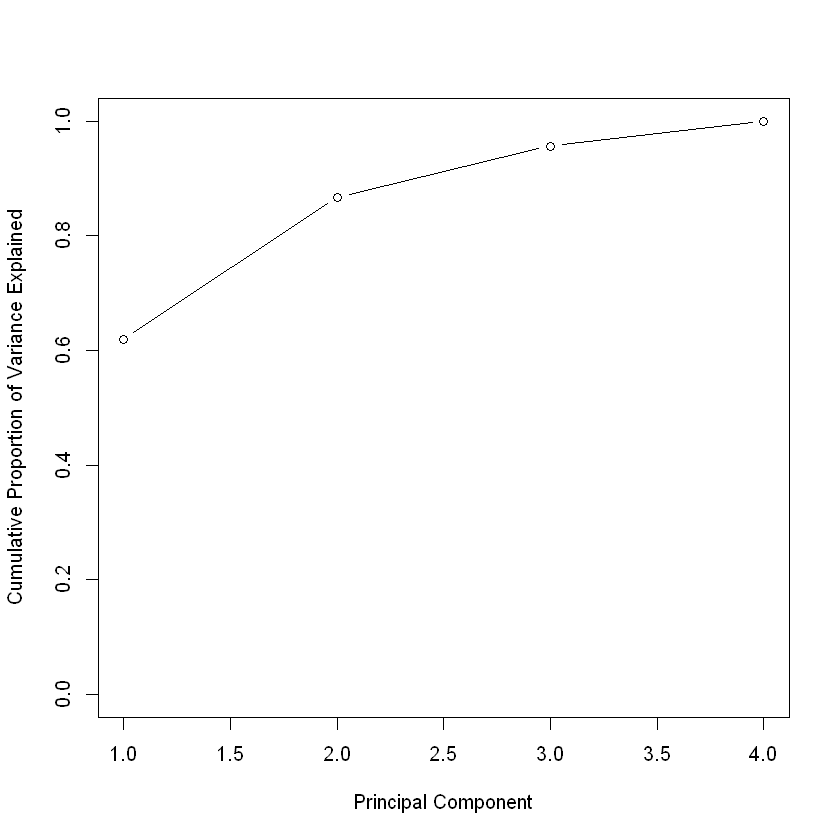

In [35]:
# PCA
states=row.names(USArrests)
states
names(USArrests)
head(USArrests)
apply(USArrests, 2, mean)
apply(USArrests, 2, var)
pr.out=prcomp(USArrests, scale=TRUE)
names(pr.out)
pr.out$center
pr.out$scale
pr.out$rotation
dim(pr.out$x)
biplot(pr.out, scale=0)
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out, scale=0)
pr.out$sdev
pr.var=pr.out$sdev^2
pr.var
pve=pr.var/sum(pr.var)
pve
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')
a=c(1,2,8,-3)
cumsum(a)


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

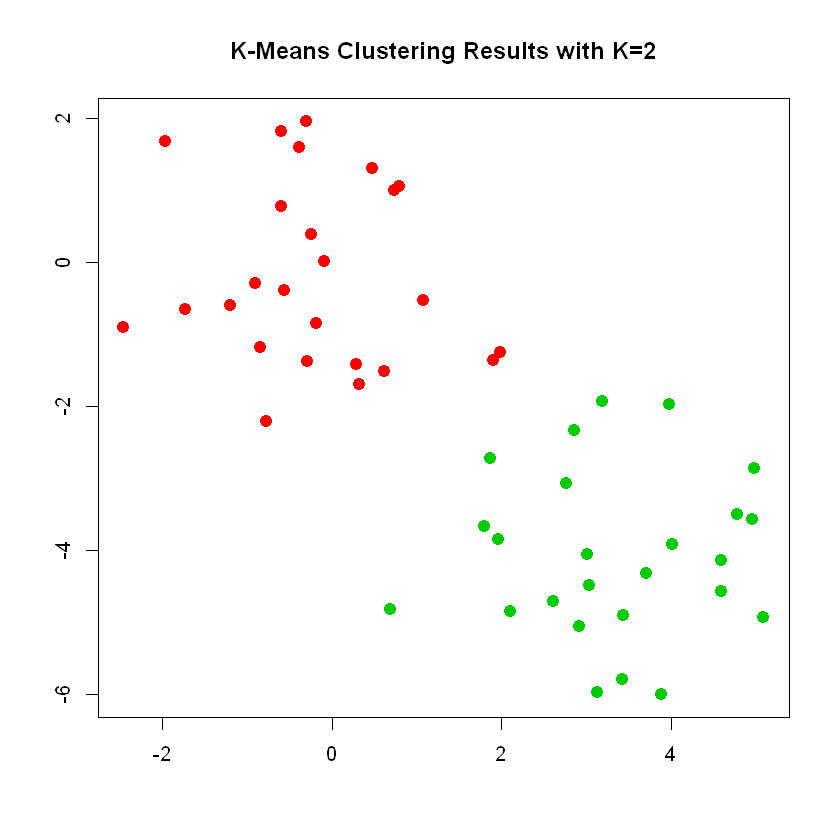

[1] 104.3319

[1] 97.97927

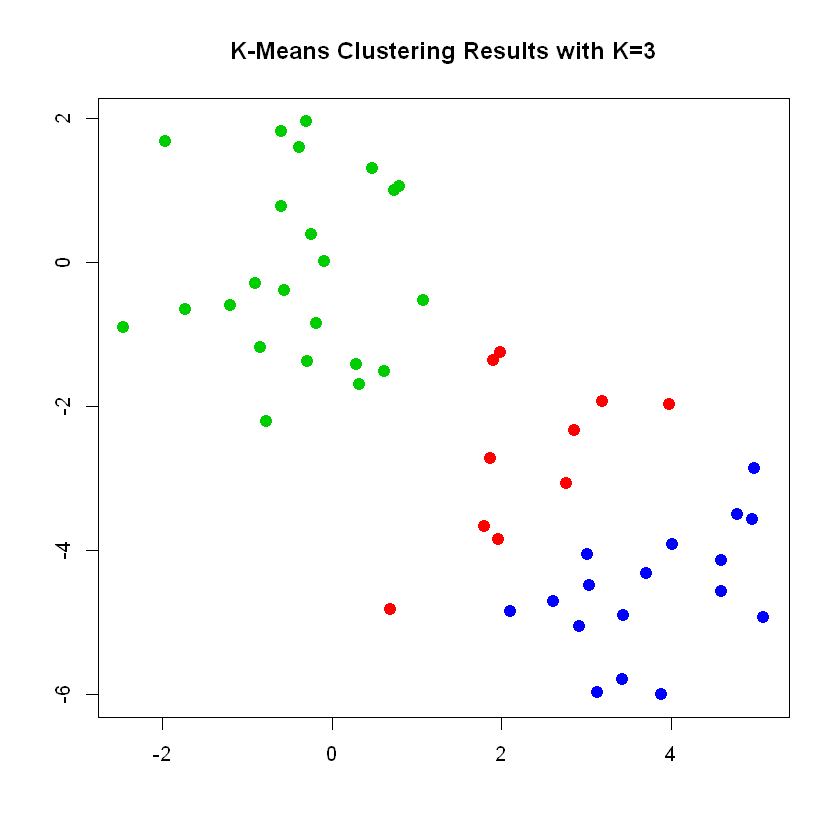

In [36]:
# Chapter 10 Lab 2: Clustering

# K-Means Clustering

set.seed(2)
x=matrix(rnorm(50*2), ncol=2)
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4
km.out=kmeans(x,2,nstart=20)
km.out$cluster
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)
set.seed(4)
km.out=kmeans(x,3,nstart=20)
km.out
plot(x, col=(km.out$cluster+1), main="K-Means Clustering Results with K=3", xlab="", ylab="", pch=20, cex=2)
set.seed(3)
km.out=kmeans(x,3,nstart=1)
km.out$tot.withinss
km.out=kmeans(x,3,nstart=20)
km.out$tot.withinss

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

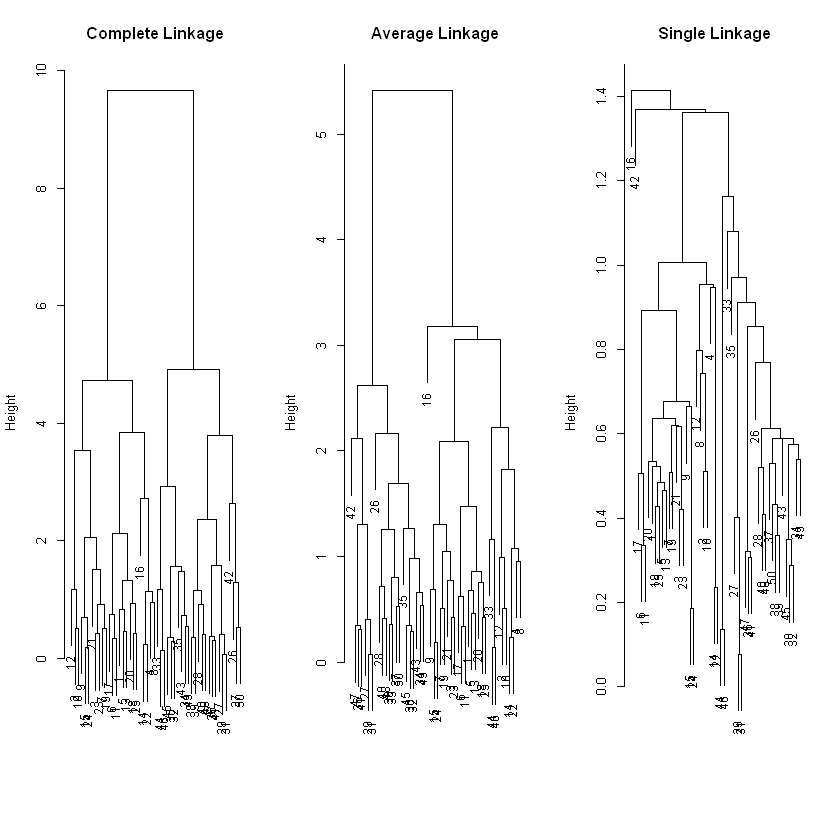

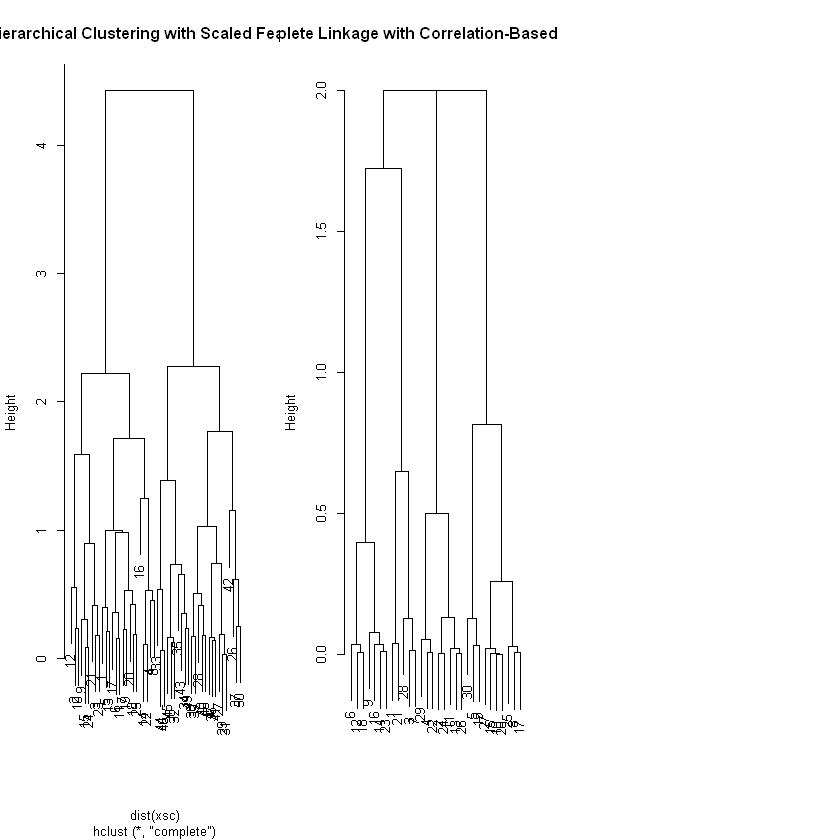

In [39]:
# Hierarchical Clustering

hc.complete=hclust(dist(x), method="complete")
hc.average=hclust(dist(x), method="average")
hc.single=hclust(dist(x), method="single")
par(mfrow=c(1,3))
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)

cutree(hc.complete, 2)
cutree(hc.average, 2)
cutree(hc.single, 2)
cutree(hc.single, 4)

xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")

